# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
import pandas as pd
import numpy as np

In [5]:
#creamos un diccionario con los datos
data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

#convertimos el dict en df

student_data = pd.DataFrame(data)


Draw a dispersion diagram (scatter plot) for the data.

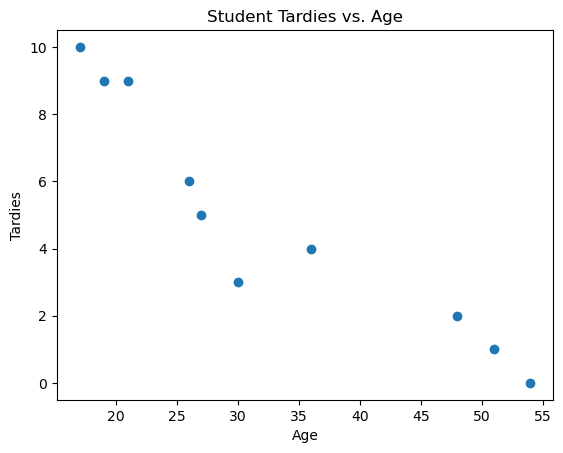

In [6]:
# Your code here.
import matplotlib.pyplot as plt

# Extract the Age and Tardies columns from the DataFrame
age = student_data['Age']
tardies = student_data['Tardies']

# Create a scatter plot
plt.scatter(age, tardies)

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Student Tardies vs. Age')

# Display the plot
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

* Según el diagrama de dispersión, parece que hay una tendencia negativa entre la edad y el número de tardanzas. A medida que aumenta la edad, el número de tardanzas tiende a disminuir. Esto sugiere que los estudiantes mayores tienden a llegar menos tarde en comparación con los estudiantes más jóvenes.

* Una posible hipótesis basada en esta observación podría ser que a medida que los estudiantes crecen, se vuelven más responsables y administran mejor su tiempo, lo que resulta en menos casos de tardanzas. Sin embargo, es importante tener en cuenta que este gráfico de dispersión representa una pequeña muestra de datos, y se necesitaría un análisis más detallado para sacar conclusiones definitivas.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

print("Covariance:", covariance)
print("Correlation:", correlation)


Covariance: -45.56666666666667
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
from sklearn.linear_model import LinearRegression

# creamos las dos variables
X = student_data[['Age']]
y = student_data['Tardies']

# inicializamos el linear regression model
regression_model = LinearRegression()

# entrenamos con la data
regression_model.fit(X, y)



LinearRegression()

Plot your regression model on your scatter plot.

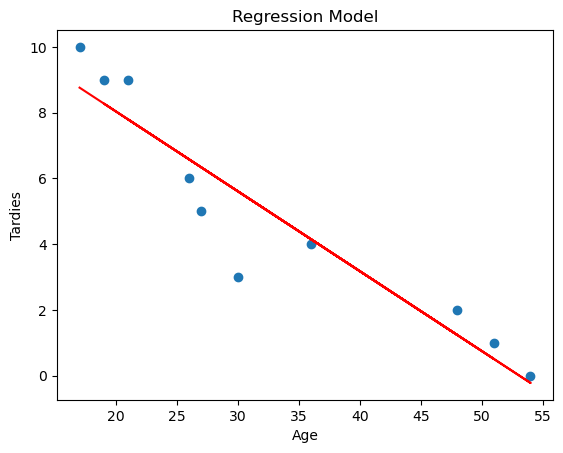

In [9]:
# Your code here.
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'])

# Regression line
plt.plot(student_data['Age'], regression_model.predict(X), color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Regression Model')

# Show the plot
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

* El diagrama de dispersión muestra cierta variabilidad en los puntos de datos, lo que indica que la edad por sí sola puede no ser un predictor perfecto de tardanzas. Otros factores también pueden influir en las tardanzas, que no se tienen en cuenta en el modelo actual.

In [3]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
# selecionamos las variables para el análisis 

selected_vars = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
df_selected = vehicles[selected_vars]

# Calculamos la correlations
correlations = df_selected.corr()

# Print la matriz de correlation
print(correlations)

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
# importamos
from sklearn.linear_model import LinearRegression

# Hacemos Split de la data en variables independientes (X) (y)
X = df_selected.iloc[:, :-1]
y = df_selected.iloc[:, -1]

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)


LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
# importamos
import statsmodels.api as sm

# Añadimos una columna constante de la variable independiente
X = sm.add_constant(X)

# Creamos una instancia OLS (ordinary least squares) model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                             17:04:13   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Creamos el df

data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)
df.head()


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

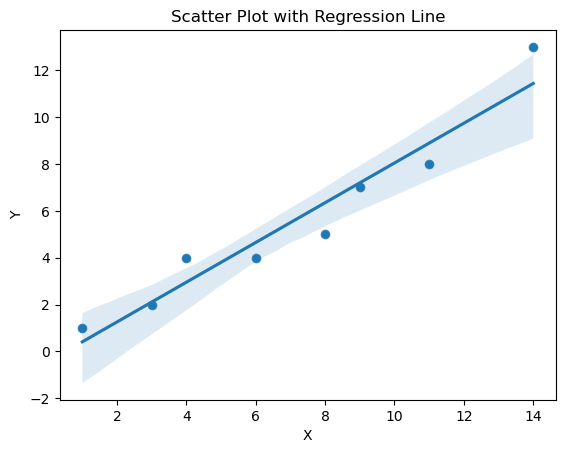

In [15]:
# importamos
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el scatter plot
sns.scatterplot(x='X', y='Y', data=df)

# Ajustar una línea de regresión
sns.regplot(x='X', y='Y', data=df)

# Configurar el título y los nombres de los ejes
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Mostrar el gráfico
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

* El gráfico de dispersión con la línea de regresión ajustada muestra una relación positiva entre las variables 'X' (número de personas invitadas) e 'Y' (número de personas que asistieron). A medida que aumenta el número de personas invitadas, parece haber un aumento en el número de personas que asisten

In [16]:
# Your response here. 
import statsmodels.api as sm

# Agregar una columna de unos para el intercepto en la regresión
df['intercept'] = 1

# Definir las variables independientes (X) y la variable dependiente (Y)
X = df[['intercept', 'X']]
Y = df['Y']

# Crear el modelo de regresión y ajustarlo a los datos
model = sm.OLS(Y, X)
results = model.fit()

# Imprimir los resultados de la regresión
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 24 May 2023   Prob (F-statistic):           0.000102
Time:                        17:09:24   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4394      0.759     -0.579      0.5

c:\Users\GAMM\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<AxesSubplot:xlabel='X', ylabel='Y'>

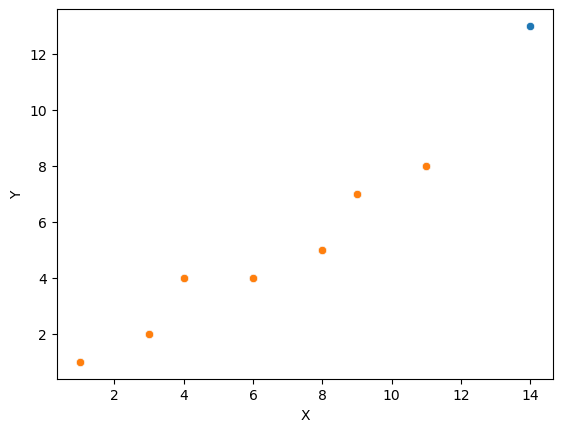

In [17]:

# Crear un nuevo DataFrame con los datos originales
df_clean = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14],
                         'Y': [1, 2, 4, 4, 5, 7, 8, 13]})

# Visualizar el diagrama de dispersión antes de eliminar los valores atípicos
sns.scatterplot(data=df_clean, x='X', y='Y')

# Calcular los límites superior e inferior para los valores atípicos
Q1 = df_clean['Y'].quantile(0.25)
Q3 = df_clean['Y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar los valores atípicos basados en los límites calculados
df_clean = df_clean[(df_clean['Y'] >= lower_bound) & (df_clean['Y'] <= upper_bound)]

# Visualizar el diagrama de dispersión después de eliminar los valores atípicos
sns.scatterplot(data=df_clean, x='X', y='Y')


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*  Sin el valor atípico, es posible que la línea de regresión se haya ajustado más cerca de la tendencia general de los datos.

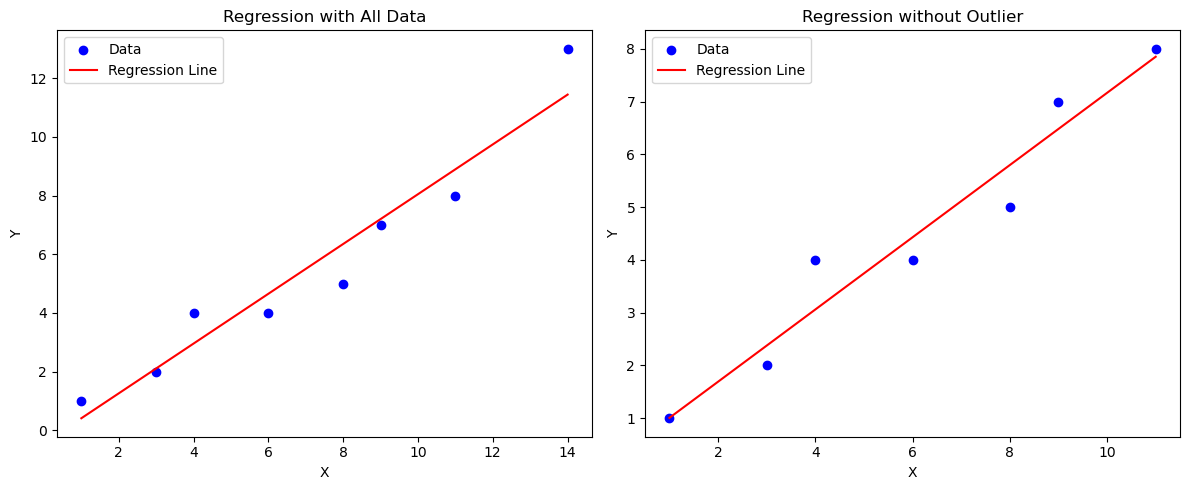

In [18]:
# Esto lo dejo por aquí porque me parece muy interezante del alcance del chat para análisis de datos

# Datos originales
X = [1, 3, 4, 6, 8, 9, 11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]

# Ajuste del modelo de regresión con todos los puntos de datos
coefficients_all = np.polyfit(X, Y, 1)
regression_line_all = np.polyval(coefficients_all, X)

# Ajuste del modelo de regresión sin el valor atípico
X_no_outlier = [1, 3, 4, 6, 8, 9, 11]
Y_no_outlier = [1, 2, 4, 4, 5, 7, 8]
coefficients_no_outlier = np.polyfit(X_no_outlier, Y_no_outlier, 1)
regression_line_no_outlier = np.polyval(coefficients_no_outlier, X_no_outlier)

# Crear los gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico con todos los puntos de datos
ax1.scatter(X, Y, color='blue', label='Data')
ax1.plot(X, regression_line_all, color='red', label='Regression Line')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Regression with All Data')
ax1.legend()

# Gráfico sin el valor atípico
ax2.scatter(X_no_outlier, Y_no_outlier, color='blue', label='Data')
ax2.plot(X_no_outlier, regression_line_no_outlier, color='red', label='Regression Line')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Regression without Outlier')
ax2.legend()

plt.tight_layout()
plt.show()
